In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%pylab inline
matplotlib.style.use('bmh')
from lmfit import Model
import matplotlib.mlab as mlab
from lmfit.models import LinearModel, QuadraticModel, LognormalModel, GaussianModel, ExponentialGaussianModel, ConstantModel
from scipy import optimize
import os
import os.path

Populating the interactive namespace from numpy and matplotlib


# Importing data and create log differences

In [6]:
users_items = pd.read_csv('userdata_2404_notoolsitemsdata.csv', usecols=[0,1,2,3,4,5])#names = ['revContributor','editCount','lifespan','start','end','gone'])



In [26]:
users_items['logEditCount'] = users_items['editCount'].apply(lambda x: np.log(1+x))


In [28]:
users_items[['editCount','logEditCount','lifespan']].describe()

,editCount,logEditCount,lifespan
count,1.378410e+05,137841.000000,137841.000000
mean,2.508435e+02,1.845402,6.194855
std,7.446734e+03,1.646456,11.211313
min,1.000000e+00,0.693147,0.000000
25%,1.000000e+00,0.693147,0.000000
50%,2.000000e+00,1.098612,0.000000
75%,9.000000e+00,2.302585,7.200000
max,2.059108e+06,14.537784,44.700000


In [33]:
seconds_scale = np.array([0,50,100,250,500,1000])
labels=['0','50','100','250','500','1000']
seconds_scale_log = np.log(1+seconds_scale)
def plot_loghist(dataframe,bins=50,scale=seconds_scale_log,label=labels):
    dataframe.hist(column='logEditCount',bins=bins)
    plt.xticks(scale, label,rotation='horizontal');
    yl = plt.gca().get_ylim()
    plt.xlim(scale[0],scale[-1])
    plt.ylim(yl)

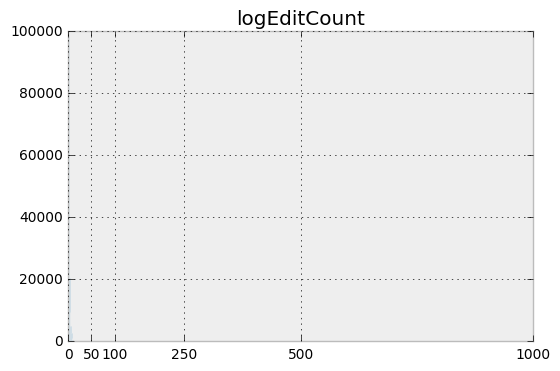

In [35]:
plot_loghist(users_items,bins=50,scale=seconds_scale,label=labels)


In [ ]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats
size = 20000
x = scipy.arange(size)
# creating the dummy sample (using beta distribution)
y = scipy.int_(scipy.round_(scipy.stats.beta.rvs(6,2,size=size)*47))
# creating the histogram
h = plt.hist(y, bins=range(48))

dist_names = ['alpha', 'beta', 'arcsine',
              'weibull_min', 'weibull_max', 'rayleigh']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,47)
plt.legend(loc='upper left')
plt.show()

## Compute the range and scale

In [11]:
min_editCount_notools = users_items['editCount'].min()
max_editCount_notools = users_items['editCount'].max()

print(min_editCount_notools,max_editCount_notools)


1 2059108


In [12]:
# we choose the scale based on the computation just made
counts_scale = np.array([1, 5, 10, 25, 100, 250, 1000, 2500, 10000, 25000, 100000, 250000, 1000000, 2500000])
labels=['1', '5', '10', '25', '100', '250', '1000', '2500', '10000', '25000', '100000', '250000', '1000000', '2500000']
#seconds_scale_log = np.log(seconds_scale) #np.log(1+seconds_scale)
def plot_loghist(dataframe,bins=50,scale=seconds_scale,label=labels):
    dataframe.hist(column='editCount',bins=bins)
    plt.xticks(scale, label,rotation='horizontal');
    yl = plt.gca().get_ylim()
    plt.xlim(scale[0],scale[-1])
    plt.ylim(yl)

# Plot histograms - tools
The majority of edits are made in less than 5 seconds, but there is a tiny peak at around 1 day.

In [19]:
print(seconds_scale_log)

[  0.           1.60943791   2.30258509   3.21887582   4.60517019
   5.52146092   6.90775528   7.82404601   9.21034037  10.1266311
  11.51292546  12.4292162   13.81551056  14.73180129]


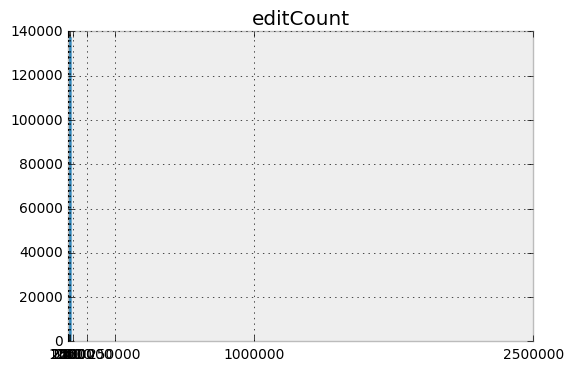

In [20]:
#plot_loghist(users_items,bins=42,scale=seconds_scale_log[0:4],label=labels[0:4])
plot_loghist(users_items,bins=100,scale=seconds_scale,label=labels)


#plot_loghist(users_items,bins=100,scale=seconds_scale_log,label=labels)
#there is a third peak away that is several order of magnitude smaller (so we can't study it together)
#datasmall = data_tools[data_tools['difference']>60]
#plot_loghist(datasmall,bins=50,scale=seconds_scale_log[2:],label=labels[2:])
#we keep the whole dataset now (alex)

In [56]:
from math import sqrt
SPINE_COLOR = 'gray'

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'text.fontsize': 8, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax


## Fit tools for the third peak (1 day)
Let's compute the best fit for the second plot

[[Model]]
    (Model(lognormal, prefix='a') + Model(lognormal, prefix='b'))
[[Fit Statistics]]
    # function evals   = 14008
    # data points      = 50
    # variables        = 6
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -522.818
    Bayesian info crit = -511.345
[[Variables]]
    acenter:      2.40576319 +/- 0.007562 (0.31%) (init= 0)
    asigma:       0.07170974 +/- 0.008317 (11.60%) (init= 1)
    aamplitude:   0.06099367 +/- 0.007197 (11.80%) (init= 1)
    bcenter:     -20.9996439 +/- 58.24085 (277.34%) (init= 0)
    bsigma:       2.65315789 +/- 3.409298 (128.50%) (init= 1)
    bamplitude:   6.3968e+16 +/- 6.00e+18 (9376.38%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(bcenter, bamplitude)       = -1.000 
    C(bcenter, bsigma)           = -1.000 
    C(bsigma, bamplitude)        =  1.000 
    C(asigma, aamplitude)        =  0.674 
    C(aamplitude, bsigma)        = -0.595 
    C(aamplitude, bcenter)       = 

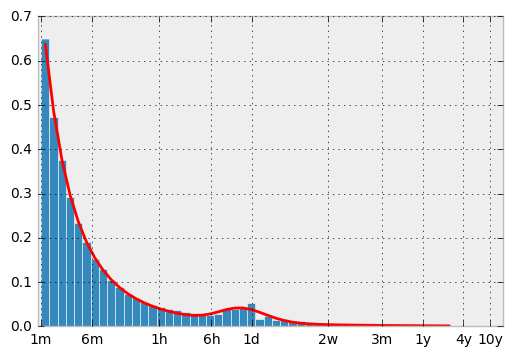

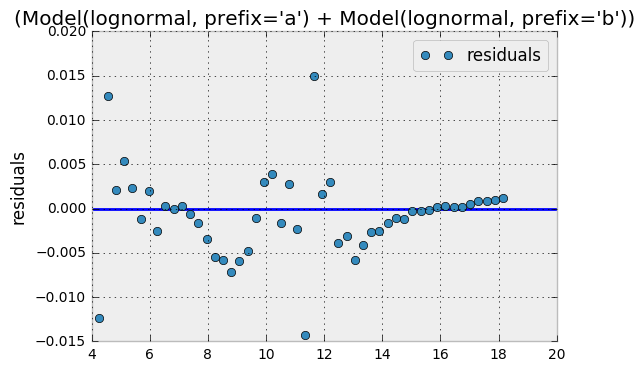

In [57]:
normd = True
plt.figure(1)
bins=50
hist = np.histogram(datasmall.logdifference,bins=bins,normed=normd)
x = 0.5*(hist[1][1:]+hist[1][:-1])
y = hist[0]
mod = LognormalModel(prefix='a')+LognormalModel(prefix='b')#+LognormalModel(prefix='c')+LognormalModel(prefix='d')
result = mod.fit(y, x=x)#,params=pars)
print(result.fit_report())
pyplot.hold(True)
plt.hist(datasmall.logdifference, normed=normd,bins=bins)
plt.plot(x, result.best_fit, 'r-')
plt.xticks(seconds_scale_log[2:], labels[2:],rotation='horizontal');
plt.figure(2)
result.plot_residuals()

Now we compute the minimum between the two peaks

Threshold in seconds:  25875.2422809
Threshold in hours:  7.18756730024


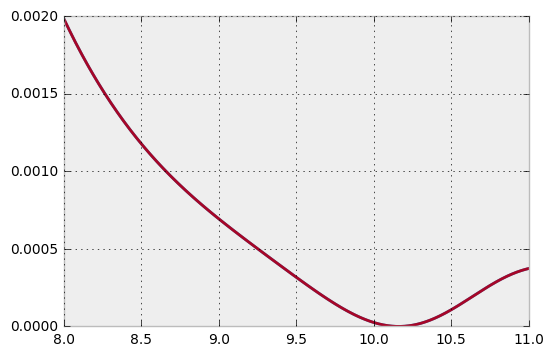

In [58]:
x = linspace(8,11,200)
torefit = result.eval_components(x=x)
twoandthree = np.array(torefit['a'])-np.array(torefit['b'])
plt.plot(x,twoandthree**2)
x2 = linspace(8,11,2000)
torefit2 = result.eval_components(x=x2)
twoandthree2 = np.array(torefit2['a'])-np.array(torefit2['b'])
plt.plot(x2,twoandthree2**2)
print("Threshold in seconds: ", (np.exp(x2[np.argmin(twoandthree2**2)])-1))
print("Threshold in hours: ", (np.exp(x2[np.argmin(twoandthree2**2)])-1)/3600)

## No tools

In [ ]:
#data_notools.to_csv('michael_datanotools_differences.csv', header=True) 

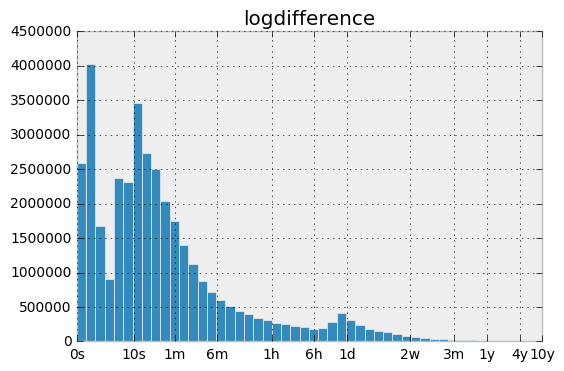

In [61]:
plot_loghist(data_notools)

[[Model]]
    (((Model(lognormal, prefix='a') + Model(lognormal, prefix='b')) + Model(lognormal, prefix='c')) + Model(lognormal, prefix='d'))
[[Fit Statistics]]
    # function evals   = 10137
    # data points      = 50
    # variables        = 12
    chi-square         = 0.004
    reduced chi-square = 0.000
    Akaike info crit   = -453.776
    Bayesian info crit = -430.831
[[Variables]]
    acenter:      1.18539313 +/- 264.2053 (22288.41%) (init=-0.8)
    asigma:       1.08011053 +/- 45.75291 (4235.95%) (init= 0.36)
    aamplitude:   2.99225138 +/- 1.21e+03 (40412.99%) (init= 0.2)
    bcenter:      1.11981079 +/- 1.391526 (124.26%) (init= 1.2)
    bsigma:       0.50980767 +/- 1.626108 (318.97%) (init= 0.5)
    bamplitude:   2.60710614 +/- 92.34074 (3541.89%) (init= 0.8)
    ccenter:      1.86310923 +/- 21.89191 (1175.02%) (init= 2.43)
    csigma:       0.76138847 +/- 12.95852 (1701.96%) (init= 0.2)
    camplitude:   39.7425273 +/- 1.31e+04 (33051.76%) (init= 0.2)
    dcenter:      1.

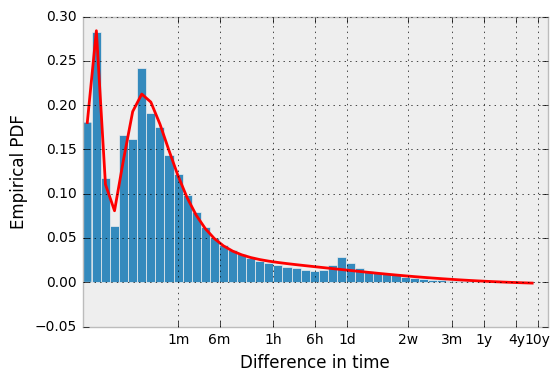

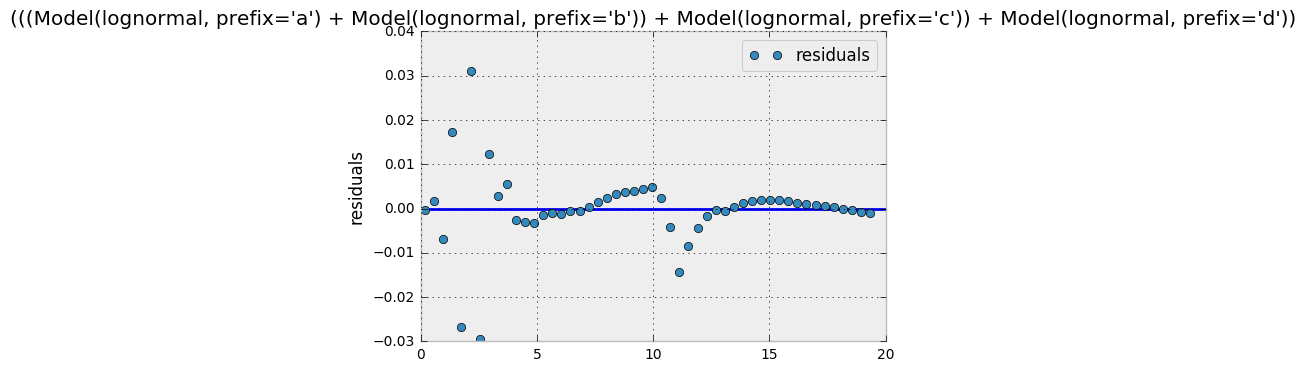

In [67]:
normd = True
plt.figure(1)
bins=50
hist = np.histogram(data_notools.logdifference,bins=bins,normed=normd)
x = 0.5*(hist[1][1:]+hist[1][:-1])
y = hist[0]
mod = LognormalModel(prefix='a')+LognormalModel(prefix='b')+LognormalModel(prefix='c')+LognormalModel(prefix='d')
pars  = mod.make_params(acenter=-0.8, asigma=0.36, aamplitude=0.2, bcenter=1.2,bsigma=0.5,bamplitude=0.8,ccenter=2.43,csigma=0.2,camplitude=0.2)

result = mod.fit(y, x=x,params=pars)
print(result.fit_report())
#latexify(columns=1)
pyplot.hold(True)
plt.hist(data_notools.logdifference, normed=normd,bins=bins)
plt.plot(x, result.best_fit, 'r-')
plt.xticks(seconds_scale_log[2:], labels[2:],rotation='horizontal');
plt.ylabel('Empirical PDF')
plt.xlabel('Difference in time')
#plt.tight_layout()
#format_axes(plt.gca())
#plt.savefig("fit.pdf")
plt.figure(2)
result.plot_residuals()

As we can see, it's a good fit but we want to have 3 distributions, let's try with a expnorm

[[Model]]
    ((Model(lognormal, prefix='a') + Model(lognormal, prefix='c')) + Model(expgaussian, prefix='d'))
[[Fit Statistics]]
    # function evals   = 201
    # data points      = 50
    # variables        = 10
    chi-square         = 0.004
    reduced chi-square = 0.000
    Akaike info crit   = -457.831
    Bayesian info crit = -438.711
[[Variables]]
    acenter:     -0.64086225 +/- 0.050881 (7.94%) (init=-0.6366354)
    asigma:       0.56211525 +/- 0.033182 (5.90%) (init= 0.5932666)
    aamplitude:   0.23555652 +/- 0.011151 (4.73%) (init= 0.2504402)
    ccenter:      2.43982097 +/- 0.040615 (1.66%) (init= 2.417159)
    csigma:       0.12886442 +/- 0.041092 (31.89%) (init= 0.02351624)
    camplitude:   0.06138375 +/- 0.017681 (28.81%) (init= 0.0167078)
    dcenter:      1.85034472 +/- 0.045022 (2.43%) (init= 1.87)
    damplitude:   0.70184519 +/- 0.021419 (3.05%) (init= 0.68)
    dsigma:       0.53914464 +/- 0.064495 (11.96%) (init= 0.43)
    dgamma:       0.49591287 +/- 0.031471

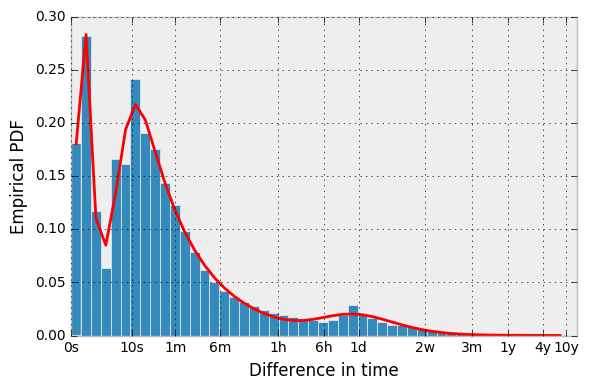

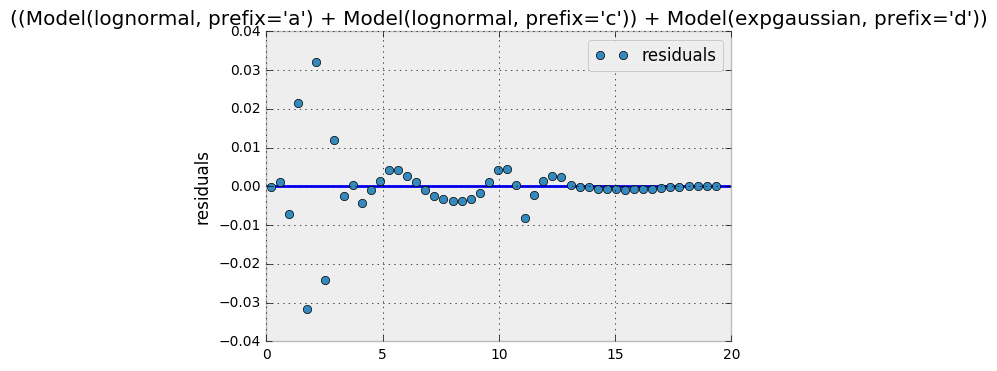

In [68]:
list = data_notools.logdifference
normd = True
plt.figure(1)
hist = np.histogram(list,bins=50,normed=normd)
x = 0.5*(hist[1][1:]+hist[1][:-1])
y = hist[0]


mod = LognormalModel(prefix='a')+LognormalModel(prefix='c')+ExponentialGaussianModel(prefix='d')     
pars  = mod.make_params(acenter=-0.63663540, asigma=0.59326659, aamplitude=0.25044023,ccenter=2.41715948,csigma=0.02351624,camplitude=0.01670780,dcenter=1.87,damplitude=0.68,dsigma=0.43,dgamma=0.48)
#pars  = mod.make_params(acenter=-0.63663540, asigma=0.59326659, aamplitude=0.25044023,ccenter=2.41715948,csigma=0.02351624,camplitude=0.01670780)
result = mod.fit(y, x=x, params=pars)
print(result.fit_report())
#latexify(columns=1)
pyplot.hold(True)
plt.hist(list, normed=normd,bins=50)
#plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.xticks(seconds_scale_log, labels,rotation='horizontal');
plt.ylabel('Empirical PDF')
plt.xlabel('Difference in time')
plt.tight_layout()
plt.savefig("fit.pdf")
#format_axes(plt.gca())
#plt.savefig("fit.pdf")
plt.figure(2)
result.plot_residuals()

Threshold in seconds:  14901.8038536
Threshold in hours:  4.13938995934


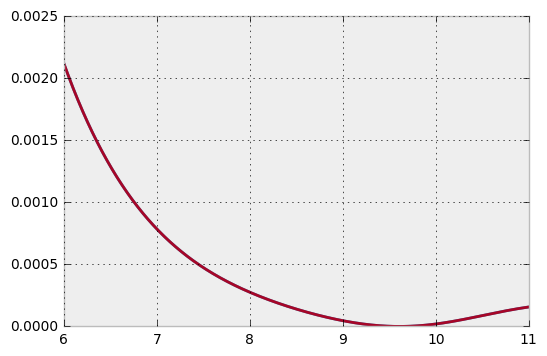

In [64]:
x = linspace(6,11,200)
torefit = result.eval_components(x=x)
twoandthree = np.array(torefit['d'])-np.array(torefit['c'])
plt.plot(x,twoandthree**2)
x2 = linspace(6,11,2000)
torefit2 = result.eval_components(x=x2)
twoandthree2 = np.array(torefit2['d'])-np.array(torefit2['c'])
plt.plot(x2,twoandthree2**2)
print("Threshold in seconds: ", (np.exp(x2[np.argmin(twoandthree2**2)])-1))
print("Threshold in hours: ", (np.exp(x2[np.argmin(twoandthree2**2)])-1)/3600)